# Diff and Integral in Sympy

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 
import sympy
sympy.init_printing()

## Diff

In [3]:
x = sympy.symbols('x')
t, s = sympy.symbols('t, s')
a = sympy.symbols('a', real=True, positive=True)
f=sympy.sin(x)
f
diff_f=sympy.diff(f, x)
diff_f



In [28]:
f=(x+a)**5
sympy.expand(f)

In [5]:
f=sympy.cos(x)
f
diff_f=sympy.diff(f, x)
diff_f

In [6]:
f = sympy.exp(-a*t)
diff_f=sympy.diff(f,t)
f
diff_f

In [7]:
f = sympy.exp(x**2)
diff_f=sympy.diff(f,x)
f
diff_f

## Integral

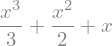

In [8]:
f=x**2 + x + 1
integ_f=sympy.integrate(f,x)
f
integ_f

In [9]:
# from sympy import *
f=sympy.exp(-x)
integ_f=sympy.integrate(f, (x, 0, sympy.oo))
f
integ_f


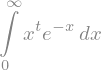

In [10]:
integ = sympy.Integral(x**t*sympy.exp(-x), (x, 0, sympy.oo))
integ

## Limit

In [11]:
sympy.limit(sympy.sin(x)/x, x, 0)

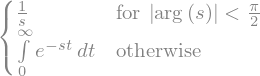

In [12]:
f=sympy.exp(-s*t)
integ_f=sympy.integrate(f, (t, 0, sympy.oo))
f
integ_f

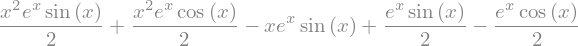

In [13]:
f=x**2 * sympy.exp(x) * sympy.cos(x)
integ_f=sympy.integrate(f,x)
f
integ_f

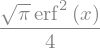

In [14]:
f=sympy.exp(-x**2)*sympy.erf(x)
integ_f=sympy.integrate(f,x)
f
integ_f

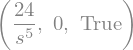

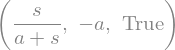

In [15]:
# from sympy import DiracDelta, exp, laplace_transform
# from sympy.abc import t, s, a
sympy.laplace_transform(t**4, t, s)
sympy.laplace_transform(t**a, t, s)
sympy.laplace_transform(sympy.DiracDelta(t)-a*sympy.exp(-a*t), t, s, simplify=True)

## Taylor Expansion 泰勒展开

 They are polynomial approximations and can easily be calculated using the sympy.series function.  
 Note that Sympy uses the number of terms instead of the order of the polynomial, so this is a second order polynomial about the point x=2

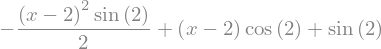

In [29]:
x=sympy.symbols('x')
f = sympy.sin(x)
f
f.series(x, 2, 3).removeO()

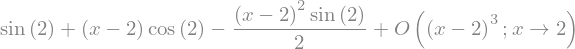

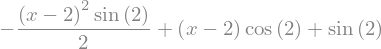

In [30]:
f
g=sympy.series(f,x,2,3)
g1=g.removeO()
g
g1

Let's plot a couple of approximations of sin(x):

In [18]:
def taylor(xlim, ylim):
    p = sympy.plot(f, (x, *xlim), show=False)
    colors = ['red', 'green', 'magenta', 'brown']
    for n, color in enumerate(colors, 1):
        approx = f.series(x, 2, n).removeO()
        p.extend(sympy.plot(approx, (x, *xlim),
                 line_color=color, show=False))
        p[n].label = f'Order: {n-1}'
    p.ylim = ylim
    p.xlim = xlim
    p.legend = True
    p.show()

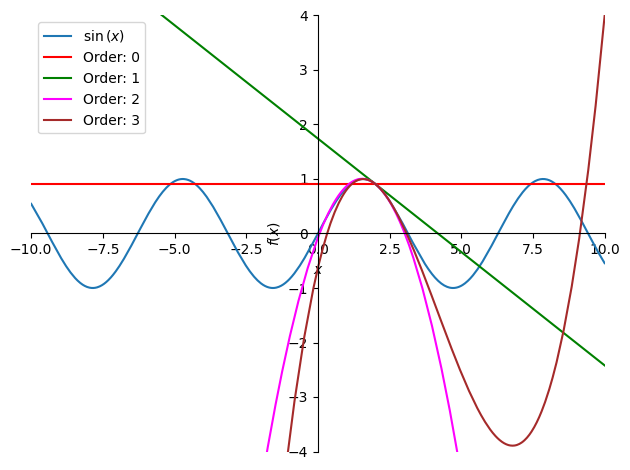

In [19]:
taylor((-10, 10), (-4, 4))

An important characteristic of all polynomial approximations is that the function always grows large "far enough" away from the origin and therefore cannot model asymptotes very well. Let's zoom out on that graph a bit:

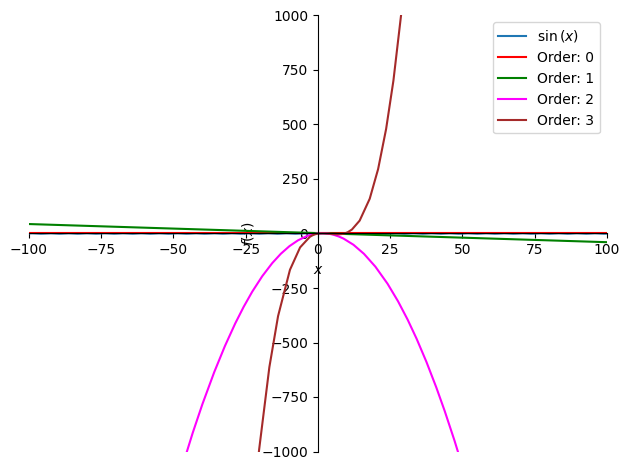

In [20]:
taylor((-100, 100), (-1000, 1000))

## Padé Approximant 帕得近似

Padé approximation is an extension of the concept of Taylor approximation with rational functions rather than polynomials. The basic premise is that the approximation is made by matching derivatives at a particular point. Padé approximants are often associated with dead time approximation, but can be used for arbitrary transfer functions as well.

One of the big benefits of Padé approximants is that rational functions can become constant for large magnitudes of 
.

We will approximate a Laplace dead time

In [31]:
s=sympy.symbols('s')
f=sympy.exp(-2*s)
f

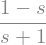

In [33]:
import tbcontrol.symbolic
s0=0
f_pade=tbcontrol.symbolic.pade(f,s,1,1,s0)
f_pade

Compare this with a taylor approximation with same number of coefficients (matching the same number of derivatives)

In [34]:
f_taylor=f.series(s,s0,3).removeO()
f_taylor

So how much do the approximations resemble the original function?

First, let’s check just the real part

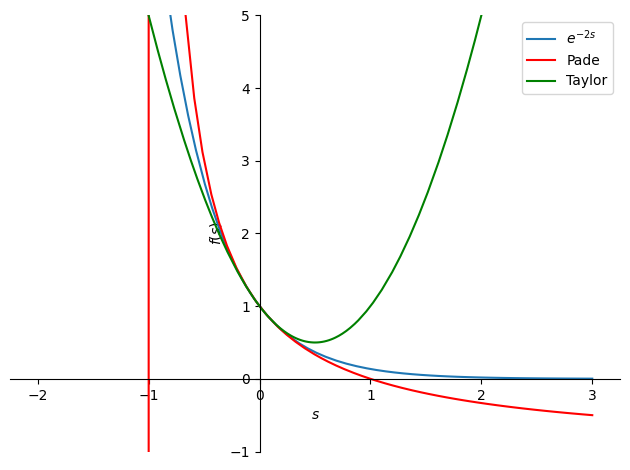

In [36]:
plotrange = (s, -2, 3)
def plot_approx(G, G_pade, G_taylor):
    p = sympy.plot(G, plotrange, show=False)
    pade_approx = sympy.plot(G_pade, plotrange, show=False, line_color='red')
    taylor_approx = sympy.plot(G_taylor, plotrange, show=False, line_color='green')
    p.extend(pade_approx)
    p.extend(taylor_approx)
    p[1].label = 'Pade'
    p[2].label = 'Taylor'
    p.ylim = (-1, 5)
    p.legend = True
    p.show()
plot_approx(f, f_pade, f_taylor)

Note the singularity in the Padé approximation, as well as the fact that the Taylor polynomial has an unbounded error to the right, while the Padé approximation is better behaved.

Now, let’s see what this looks like for the whole complex plane

In [37]:
try:
    import mpmath
except ImportError:
    from sympy import mpmath

In [38]:
def cplot(G):
    f = sympy.lambdify(s, G, ['mpmath', 'numpy'])
    mpmath.cplot(f, [-2, 2], [-2, 2], points=10000)

The original function

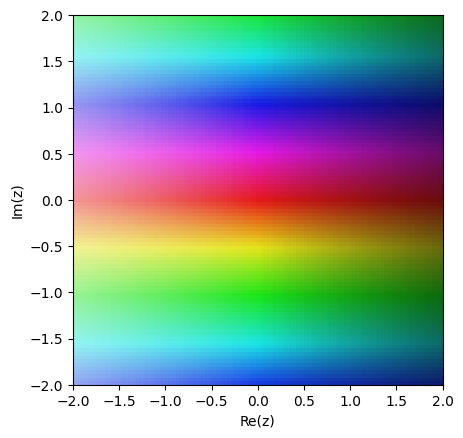

In [39]:
cplot(f)

Pade approximation

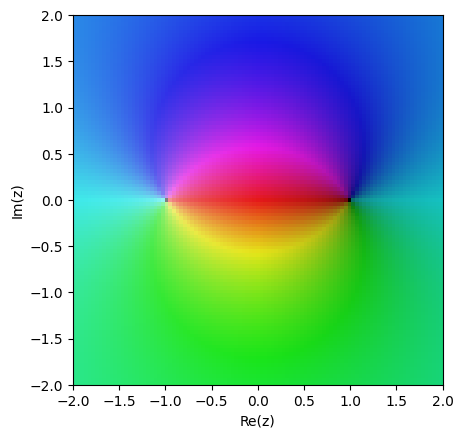

In [40]:
cplot(f_pade)

Taylor approximation



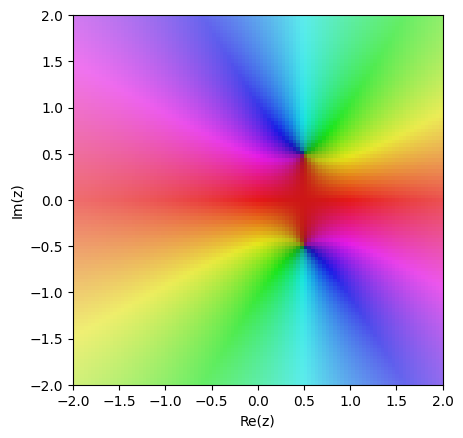

In [41]:
cplot(f_taylor)

The Pade approximation is much better in the region around 0.



## Laurent Series 劳伦序列